In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Scania_Thesis/dino-main
!ls

/content/drive/MyDrive/Scania_Thesis/dino-main
dino_deitsmall8_linearweights.pth		     LICENSE
DINO_TEST.ipynb					     main_dino.py
dino_xcit_medium_24_p8_linearweights.pth	     __pycache__
dino_xcit_medium_24_p8_pretrain_full_checkpoint.pth  README.md
eval_copy_detection.py				     requirements.txt
eval_image_retrieval.py				     run_with_submitit.py
eval_knn.py					     utils.py
eval_linear.py					     video_generation.py
eval_video_segmentation.py			     vision_transformer.py
hubconf.py					     visualize_attention.py


In [4]:
!pip install timm

     |████████████████████████████████| 431 kB 5.3 MB/s 


In [ ]:
!python main_dino.py --arch vit_small --batch_size_per_gpu 12 --data_path /content/drive/MyDrive/Scania_Thesis/Dataset_Resized/train --output_dir /content/drive/MyDrive/Scania_Thesis/dino-main

Using cache found in /root/.cache/torch/hub/facebookresearch_xcit_main
Will run the code on one GPU.
| distributed init (rank 0): env://
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
git:
  sha: N/A, status: clean, branch: N/A

arch: vit_small
batch_size_per_gpu: 12
clip_grad: 3.0
data_path: /content/drive/MyDrive/Scania_Thesis/Dataset_Resized/train
dist_url: env://
drop_path_rate: 0.1
epochs: 100
freeze_last_layer: 1
global_crops_scale: (0.4, 1.0)
gpu: 0
local_crops_number: 8
local_crops_scale: (0.05, 0.4)
local_rank: 0
lr: 0.0005
min_lr: 1e-06
momentum_teacher: 0.996
norm_last_layer: True
num_workers: 10
optimizer: adamw
out_dim: 65536
output_dir: /content/drive/MyDrive/Scania_Thesis/dino-main
patch_size: 16
rank: 0
saveckp_freq: 20
seed: 0
teacher_temp: 0.04
use_bn_in_head: False
use_fp16: True
warmup_epochs: 10
warmup_teacher_temp: 0.04
warmup_teacher_temp_epochs: 0
weight_decay: 0.0

In [ ]:
!python eval_linear.py --evaluate --arch vit_small --patch_size 8 --batch_size_per_gpu 1 --data_path /content/drive/MyDrive/Scania_Thesis/data_scam

Will run the code on one GPU.
| distributed init (rank 0): env://
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
git:
  sha: N/A, status: clean, branch: N/A

arch: vit_small
avgpool_patchtokens: False
batch_size_per_gpu: 1
checkpoint_key: teacher
data_path: /content/drive/MyDrive/Scania_Thesis/data_scam
dist_url: env://
epochs: 100
evaluate: True
gpu: 0
local_rank: 0
lr: 0.001
n_last_blocks: 4
num_labels: 1000
num_workers: 10
output_dir: .
patch_size: 8
pretrained_weights: 
rank: 0
val_freq: 1
world_size: 1
Please use the `--pretrained_weights` argument to indicate the path of the checkpoint to evaluate.
Since no pretrained weights have been provided, we load the reference pretrained DINO weights.
Model vit_small built.
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:288: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Pl

In [ ]:
!pip install pipreqs

!pipreqs /content/

ERROR: Failed on file: /content/drive/MyDrive/stylegan2-ada-pytorch-main/legacy.py
Traceback (most recent call last):
  File "/usr/local/bin/pipreqs", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/pipreqs/pipreqs.py", line 488, in main
    init(args)
  File "/usr/local/lib/python3.7/dist-packages/pipreqs/pipreqs.py", line 418, in init
    follow_links=follow_links)
  File "/usr/local/lib/python3.7/dist-packages/pipreqs/pipreqs.py", line 131, in get_all_imports
    raise exc
  File "/usr/local/lib/python3.7/dist-packages/pipreqs/pipreqs.py", line 117, in get_all_imports
    tree = ast.parse(contents)
  File "/usr/lib/python3.7/ast.py", line 35, in parse
    return compile(source, filename, mode, PyCF_ONLY_AST)
  File "<unknown>", line 1
    ﻿# Copyright (c) 2021, NVIDIA CORPORATION.  All rights reserved.
    ^
SyntaxError: invalid character in identifier


In [ ]:
!pip3 freeze > requirements.txt  # Python3

In [ ]:
!pip install albumentations==0.4.6

     |████████████████████████████████| 117 kB 5.3 MB/s 
     |████████████████████████████████| 948 kB 41.2 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65174 sha256=e5defb722f33ef0cc408b9d07482353d68248fe850134bccceca968edc3126dc
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from pandas.core.common import flatten
import copy
import numpy as np
import random

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader

import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

import glob
from tqdm import tqdm

In [ ]:
####################################################
#                Define parameters
####################################################

params = {
#    "model": "resnet50",
    #"device": "cuda",
#    "lr": 0.001,
    "batch_size": 12,
    "num_workers": 4,
    "n_epochs": 10,
    "image_size": 256, 
    "in_channels": 3, 
    "num_classes": 4
}

In [ ]:
train_transforms = A.Compose(
    [
        A.SmallestMaxSize(max_size=350),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=360, p=0.5),
        A.RandomCrop(height=params["image_size"], width=params["image_size"]),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.MultiplicativeNoise(multiplier=[0.5,2], per_channel=True, p=0.2),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=(-0.1,0.1), contrast_limit=(-0.1, 0.1), p=0.5),
        ToTensorV2(),
    ]
)

test_transforms = A.Compose(
    [
        A.SmallestMaxSize(max_size=350),
        A.CenterCrop(height=params["image_size"], width=params["image_size"]),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)

In [ ]:
import os
from os import listdir
from os.path import isfile, join
import xml.etree.ElementTree as ET



cwd0 = '/content/drive/MyDrive/Scania_Thesis/Camdata_test_100/Image_3024_4032/VOC2007_cam_test/JPEGImages'
onlyfiles = [os.path.join(cwd0, f) for f in os.listdir(cwd0) if 
os.path.isfile(os.path.join(cwd0, f))]
print(onlyfiles)
print(len(onlyfiles))

labels = []
cwd1 = '/content/drive/MyDrive/Scania_Thesis/Camdata_test_100/Image_3024_4032/VOC2007_cam_test/Annotations/'
for filename in os.listdir(cwd1):
    tree = ET.parse(cwd1+filename)
    root = tree.getroot()
    results = root.findall('object')
    textnumbers = [r.find('name').text for r in results]
    labels.append(textnumbers[0])
    
print(len(labels))
print(labels[99])

['/content/drive/MyDrive/Scania_Thesis/Camdata_test_100/Image_3024_4032/VOC2007_cam_test/JPEGImages/20200709_141847233_iOS.jpg', '/content/drive/MyDrive/Scania_Thesis/Camdata_test_100/Image_3024_4032/VOC2007_cam_test/JPEGImages/20200709_142028828_iOS.jpg', '/content/drive/MyDrive/Scania_Thesis/Camdata_test_100/Image_3024_4032/VOC2007_cam_test/JPEGImages/20200709_141925325_iOS.jpg', '/content/drive/MyDrive/Scania_Thesis/Camdata_test_100/Image_3024_4032/VOC2007_cam_test/JPEGImages/20200709_141745639_iOS.jpg', '/content/drive/MyDrive/Scania_Thesis/Camdata_test_100/Image_3024_4032/VOC2007_cam_test/JPEGImages/20200709_141938006_iOS.jpg', '/content/drive/MyDrive/Scania_Thesis/Camdata_test_100/Image_3024_4032/VOC2007_cam_test/JPEGImages/20200709_141721310_iOS.jpg', '/content/drive/MyDrive/Scania_Thesis/Camdata_test_100/Image_3024_4032/VOC2007_cam_test/JPEGImages/20200709_141957752_iOS.jpg', '/content/drive/MyDrive/Scania_Thesis/Camdata_test_100/Image_3024_4032/VOC2007_cam_test/JPEGImages/2020

In [ ]:
#['class1' if x=='front_wheel_with_screw' else x for x in labels]
#['class2' if x=='front_wheel_without_screw' else x for x in labels]
#['class3' if x=='back_wheel_with_screw' else x for x in labels]
#['class4' if x=='back_wheel_without_screw' else x for x in labels]
#print(labels)

for i, n in enumerate(labels):
   if n == 'front_wheel_with_screw':
      labels[i] = 'class1'
   if n == 'front_wheel_without_screw':
      labels[i] = 'class2'
   if n == 'back_wheel_with_screw':
      labels[i] = 'class3'
   if n == 'back_wheel_without_screw':
      labels[i] = 'class4'
print(labels)

['class1', 'class2', 'class4', 'class3', 'class4', 'class3', 'class2', 'class3', 'class3', 'class1', 'class1', 'class4', 'class4', 'class1', 'class3', 'class3', 'class1', 'class2', 'class3', 'class2', 'class2', 'class3', 'class1', 'class1', 'class4', 'class4', 'class3', 'class4', 'class4', 'class1', 'class1', 'class2', 'class4', 'class4', 'class4', 'class4', 'class3', 'class2', 'class4', 'class4', 'class1', 'class1', 'class1', 'class3', 'class1', 'class3', 'class2', 'class4', 'class3', 'class2', 'class4', 'class1', 'class4', 'class2', 'class1', 'class4', 'class2', 'class3', 'class1', 'class2', 'class2', 'class3', 'class3', 'class3', 'class3', 'class3', 'class3', 'class2', 'class2', 'class3', 'class2', 'class2', 'class2', 'class1', 'class1', 'class3', 'class4', 'class1', 'class2', 'class2', 'class1', 'class3', 'class1', 'class1', 'class4', 'class2', 'class2', 'class4', 'class4', 'class3', 'class2', 'class1', 'class4', 'class4', 'class3', 'class1', 'class4', 'class4', 'class1', 'class2']

In [ ]:
myset = set(labels)
#classes = list(myset)
classes = ['class1', 'class2', 'class3', 'class4']
print(classes)
idx_to_class = {i:j for i, j in enumerate(classes)}
class_to_idx = {value:key for key,value in idx_to_class.items()}
idx_to_class

['class1', 'class2', 'class3', 'class4']


{0: 'class1', 1: 'class2', 2: 'class3', 3: 'class4'}

In [ ]:
class LandmarkDataset(Dataset):
    def __init__(self, image_paths, labels, transform=False):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_filepath = self.image_paths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        label = self.labels[idx]
        label = class_to_idx[label]
        if self.transform is not None:
            image = self.transform(image=image)["image"]
        
        return image, label

In [ ]:
test_dataset = LandmarkDataset(onlyfiles,labels,test_transforms)
print('The shape of tensor for 50th image in train dataset: ',test_dataset[1][0].shape)
print('The label for 50th image in train dataset: ',test_dataset[20][1])

The shape of tensor for 50th image in train dataset:  torch.Size([3, 256, 256])
The label for 50th image in train dataset:  1


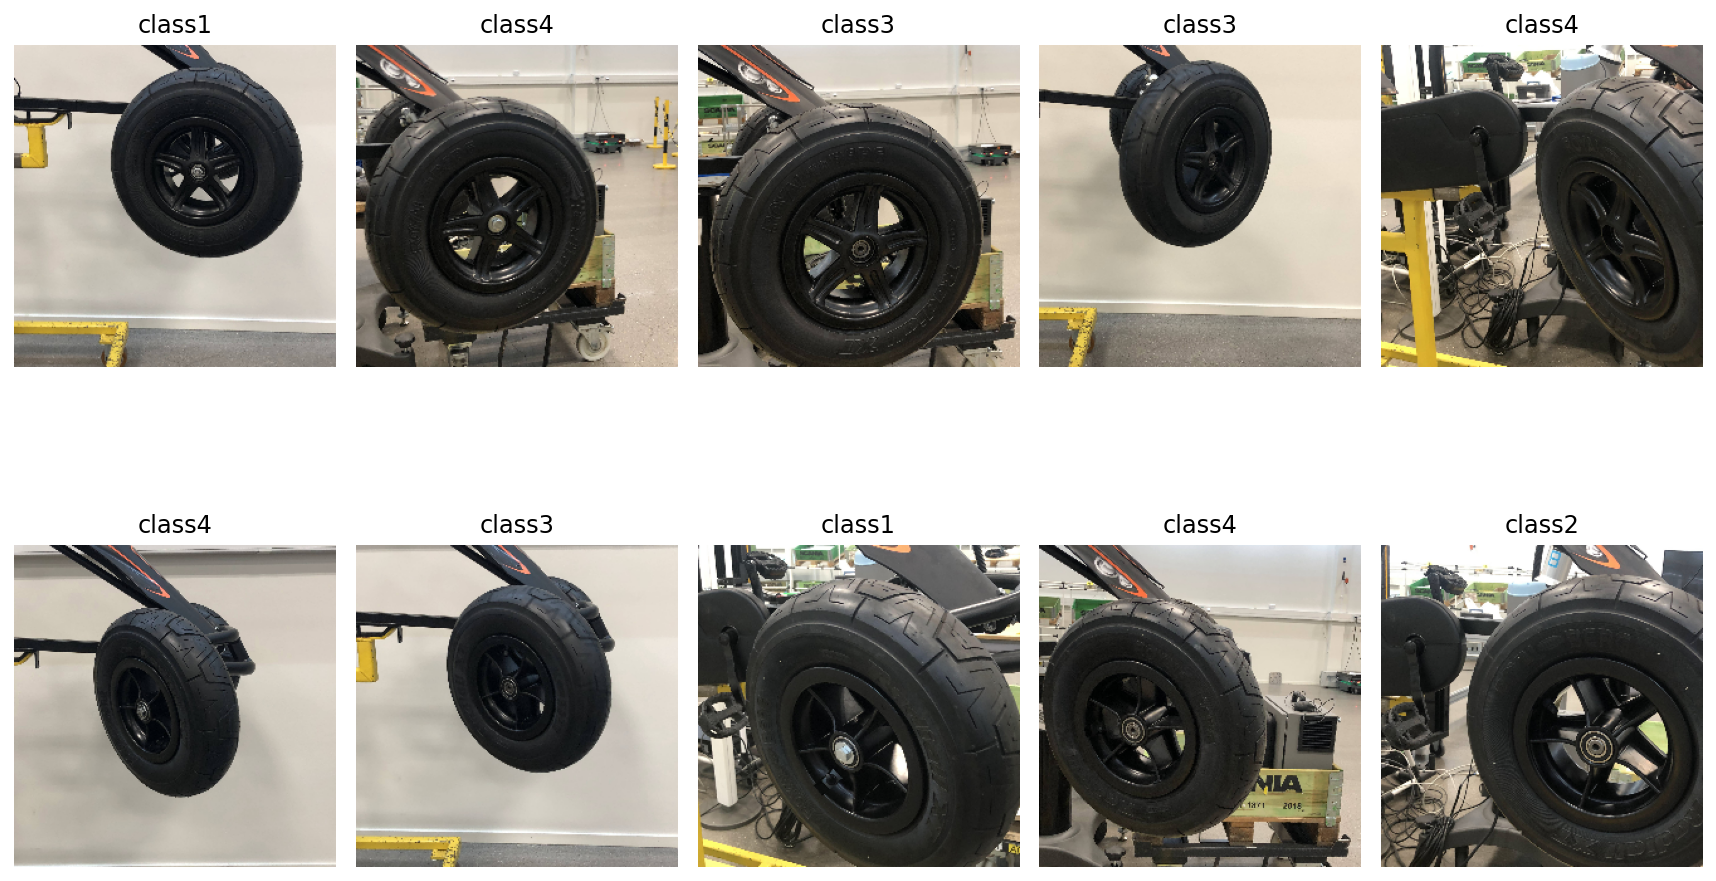

In [ ]:
def visualize_augmentations(dataset, idx=0, samples=10, cols=5, random_img = False):
    
    dataset = copy.deepcopy(dataset)
    #we remove the normalize and tensor conversion from our augmentation pipeline
    dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
    rows = samples // cols
    
        
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 8))
    for i in range(samples):
        if random_img:
            idx = np.random.randint(1,len(onlyfiles))
        image, lab = dataset[idx]
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
        ax.ravel()[i].set_title(idx_to_class[lab])
    plt.tight_layout(pad=1)
    plt.show()    

visualize_augmentations(test_dataset,np.random.randint(1,len(onlyfiles)), random_img = True)

In [ ]:
train_data_path = '/content/drive/MyDrive/Scania_Thesis/Image_640_360_nolbl_501'
test_data_path = 'images/test'

In [ ]:
####################################################
#       Create Train, Valid and Test sets
####################################################
train_data_path = '/content/drive/MyDrive/Scania_Thesis/Image_640_360_nolbl_501' 

train_image_paths = [] #to store image paths in list
classes = [] #to store class values

for data_path in glob.glob(train_data_path + '/*'):
    classes.append(data_path.split('/')[-1])
    print(classes)
    train_image_paths.append(glob.glob(data_path + '/*'))
    
train_image_paths = list(flatten(train_image_paths))
random.shuffle(train_image_paths)

print('train_image_path example: ', train_image_paths[0])
print('class example: ', classes[0])


#split train valid from train paths (80,20)
train_image_paths, valid_image_paths = train_image_paths[:int(0.8*len(train_image_paths))], train_image_paths[int(0.8*len(train_image_paths)):] 


print("\nTrain size: {}\nValid size: {}".format(len(train_image_paths), len(valid_image_paths)))

['class1']
['class1', 'class3']
['class1', 'class3', 'class4']
['class1', 'class3', 'class4', 'class2']
train_image_path example:  /content/drive/MyDrive/Scania_Thesis/Image_640_360_nolbl_501/class3/image475--2021-12-02-15-10-16.jpg
class example:  class1

Train size: 1603
Valid size: 401


In [ ]:
#######################################################
#      Create dictionary for class indexes
#######################################################

idx_to_class = {i:j for i, j in enumerate(classes)}
class_to_idx = {value:key for key,value in idx_to_class.items()}

In [ ]:
idx_to_class

{0: 'class1', 1: 'class3', 2: 'class4', 3: 'class2'}

In [ ]:
print('Length of train: ', len(train_image_paths))

Length of train:  1603


In [ ]:
#######################################################
#               Define Dataset Class
#######################################################

class LandmarkDataset(Dataset):
    def __init__(self, image_paths, transform=False):
        self.image_paths = image_paths
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_filepath = self.image_paths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        label = image_filepath.split('/')[-2]
        label = class_to_idx[label]
        if self.transform is not None:
            image = self.transform(image=image)["image"]
        
        return image, label

In [ ]:
#######################################################
#                  Create Dataset
#######################################################

train_dataset = LandmarkDataset(train_image_paths,train_transforms)
valid_dataset = LandmarkDataset(valid_image_paths,test_transforms) #test transforms are applied

In [ ]:
print('The shape of tensor for 50th image in train dataset: ',train_dataset[49][0].shape)
print('The label for 50th image in train dataset: ',train_dataset[49][1])

The shape of tensor for 50th image in train dataset:  torch.Size([3, 256, 256])
The label for 50th image in train dataset:  1


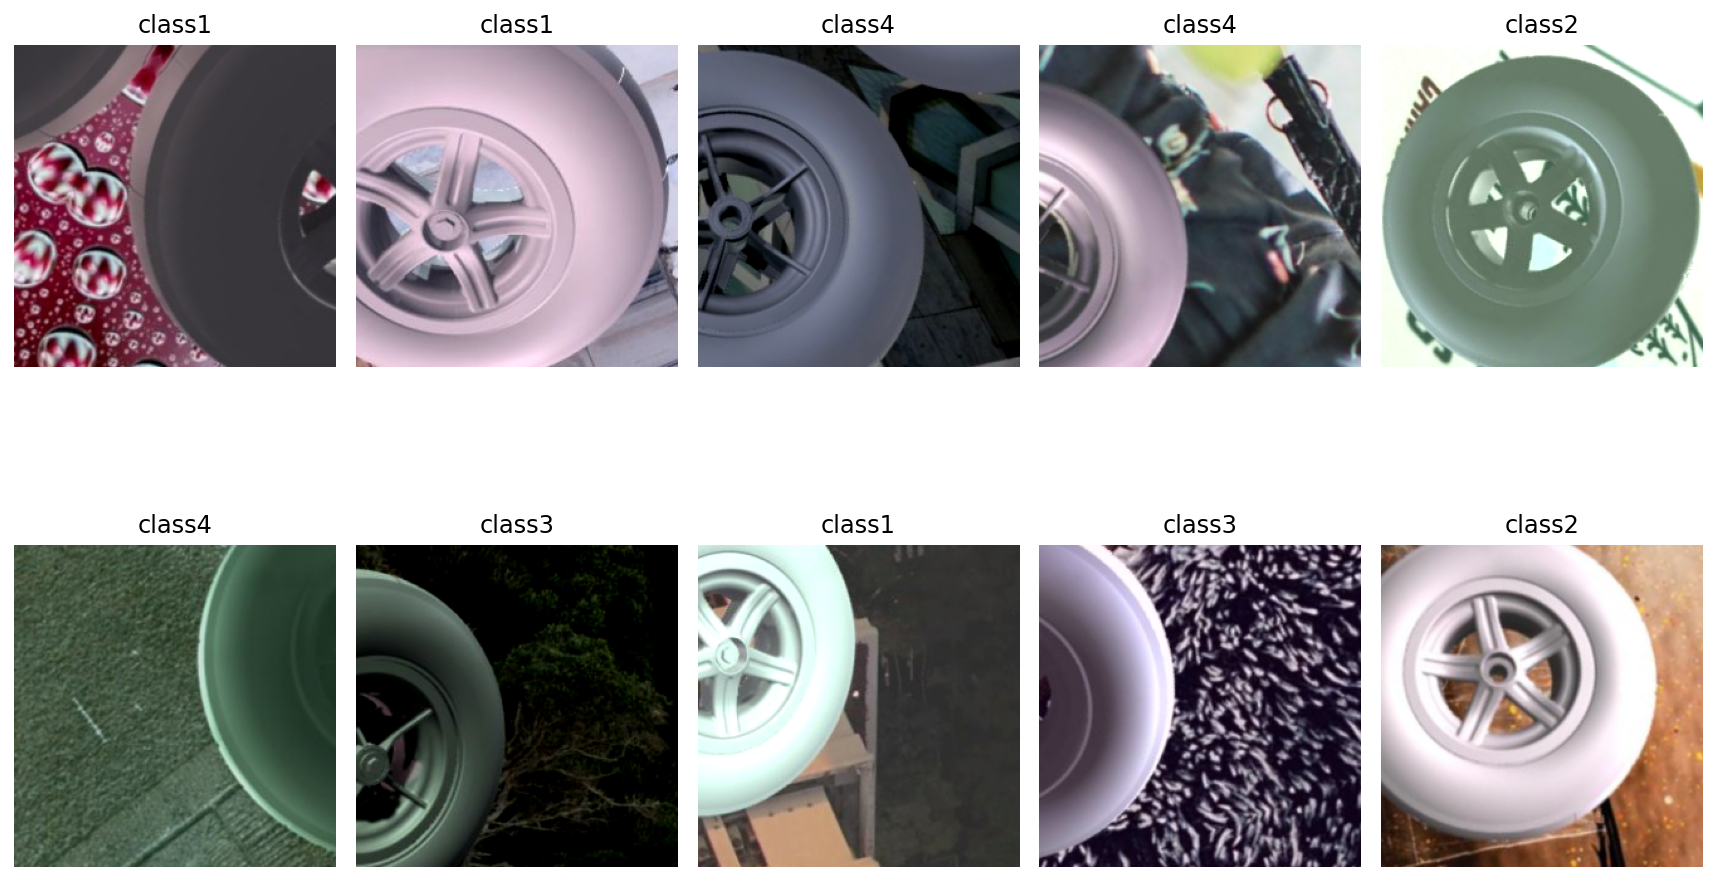

In [ ]:
#######################################################
#                  Visualize Dataset
#         Images are plotted after augmentation
#######################################################

def visualize_augmentations(dataset, idx=0, samples=10, cols=5, random_img = False):
    
    dataset = copy.deepcopy(dataset)
    #we remove the normalize and tensor conversion from our augmentation pipeline
    dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
    rows = samples // cols
    
        
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 8))
    for i in range(samples):
        if random_img:
            idx = np.random.randint(1,len(train_image_paths))
        image, lab = dataset[idx]
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
        ax.ravel()[i].set_title(idx_to_class[lab])
    plt.tight_layout(pad=1)
    plt.show()    

visualize_augmentations(train_dataset,np.random.randint(1,len(train_image_paths)), random_img = True)

In [ ]:
from torch.utils.data import DataLoader

#######################################################
#                  Define Dataloaders
#######################################################

train_loader = DataLoader(
    train_dataset, batch_size=params["batch_size"], shuffle=True
)

valid_loader = DataLoader(
    valid_dataset, batch_size=params["batch_size"], shuffle=False
)


test_loader = DataLoader(
    test_dataset, batch_size=params["batch_size"], shuffle=False
)

loaders = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

In [ ]:
from pl_bolts.datamodules import CIFAR10DataModule

#dm = CIFAR10DataModule('.')
from torch.utils.data import DataLoader

dl = DataLoader(train_dataset, batch_size=7)